## Binary Classification problem

## Method
- **Data processing:**
Both train and test datasets contains 10 numerical and categorical attributes. The psrel column, is the target variable and exists only in the training dataset. The Id column only exists in test dataset and is dropped, since it is not required for the processing process. In order to complete the data processing, we concacated the two datasets as one. In both datasets, there are some null values in the nature column, and in order to get rid of them, we replaced the missing values, with the most repeated category which is the "services". A correlation heatmap is created to see the correlations between the variables. The 'serp' variable is dropped since it is higly correlated with the variable 'rank' to deal with multicollinearity. The dataset has both categorical and numerical features. The categorical attributes of the dataset, were encoded using the Label Encoding. 

- **Random Forest Baseline Machine Learning Model:**
For the baseline machine learning technique, the model used is Random Forest Classifier, which it's a tree-based ensemble learning algorithm. The Random Forest Classifier is a collection of decision trees obtained from a subset of the training set selected at random. It combines the votes from multiple decision trees to determine the test object's final class. The reason why we used Random Forest as baseline model, is that is one of the most accurate learning algorithms in Machine Learning, producing a highly accurate classifier, by reducing the overfitting in decision trees. Also, Random Forest algorithm works very well in both continuous and categorical variables. 


 - **Dense 3 Layer Base Line Neural Network:**
After standardized the inputs, PCA is performed for dimensionality reduction and better performance.Then, a dense three layer neural model is constructed as the baseline neural network model. For the input and hidden layers, ReLu is used as the activation function. ReLu is the most commonly used activation function for the intermediate layers. For the activation function of the output layer, Sigmoid is utilized which is the most suitable for binary classification tasks.
 In terms of initializer, we choose 'he uniform' because it's a good combination with ReLu. We choose a small batch size of 25 and 50 epochs. Although binary crossentropy is used for binary classification tasks, we select mean squared error because has better performance in our case. For optimizer, we select Adamax which is faster optimizer than the regular gradient descent. 


 - **Dense Deep Neural Network:** 
Following the same logic as the article of Matthew Stewart (2019), we build three grid search algorithms to hyperparameter tuning the first three-layer model. Firstly, we execute grid search to select the appropriate initializer. Then, based on the best two initializers, we build a second grid search to find the best combination for batch size, number of epochs and initializer type. Finally, we perform a third grid search to decide the number of neurons required.
Combining all these three results we build a new and improved model with an additional hidden layer. 

 - **Wide and Deep Neural Network:**
 To examine another architecture, we execute a wide and deep neural network that connects the inputs directly to the output layer facilitating the network to learn both deep and simple patterns. We build our model based on the baseline 3 layer model but we changed the loss function to binary crossentropy which is the standard loss function for binary classification tasks and the optimizer from Adamax to Adam because it performed better. To reduce overfitting of the model, we added L2 regularization to keep the values of weights and biases small.
 
- **Improving the performance:**
For evaluation purposes, we split the training dataset to test and train with 20% the share of the test set.
Initially, we used class weights due to class imbalance of the dataset but they are removed because they did not improve the accuracy of the model to predict the minority class.
To further improve the performance of our models, we proceed to data augmentation techniques such as:
  - **Elimination of outliers via central limit theorem:** exploring the distributions of the numerical attributes based on visualisations, we see that rank and dwell have many outliers. For this purpose, we utilise Interquartile Range (IQR) to identify them and then we replace them.
  - **Oversampling using SMOTE:** Due to class imbalance in the dataset, we use Synthetic Minority Oversampling Technique (SMOTE), which is the most widely used approach for synthesizing new examples.
  - **Principal Component Analysis (PCA):** PCA is the most popular dimensionality reduction algorithm that we used for both parts with and without data augmentation, since it significantly improves the performance of the neural networks. Instead of specifying the number of dimensions, we set the ratio of variance in the dataset that we want to preserve. (i.e. 95%)  


In terms of training schedule, we use both grid search and manually hyperparameter tuning to improve the performance of each network. We tried to improve further the performance of the dense deep network by replacing relu activation function with selu and initializer to lecun normal as well as adding dropouts of 0.1 as grid search proposed. However, the scores were reduced.

# Results and Discussion
 - For random forest, the data augmentation deterioted the performance of the model. This is because scaling data deteriorate the performance of tree-based model.
 - Data augmentation improved significantly the scores of all neural networks.
 - In terms of dense deep neural network, adding dropouts (0.1) to the hidden layers based on the result of the grid search, did not help the network to generalize better.
 - Wide and Deep network has the best performance in terms of kaggle score. However, the performance on the test dataset based on F1 score is quite similar for both wide and deep and dense deep neural networks
 
 - The F1-score for each model is presented in the following table:


 Model | F1-score | F1-score (with Data Augmentation) 
--- | --- | ---  
Random Forest | 0.56 | 0.97
Dense 3 Layer NN | 0.48 | 0.90
Dense Deep NN  | 0.51| 0.94
Wide Deep NN | 0.48 | 0.93

 - Amongst all of our models, the best performing is Wide and Deep Neural Networks with an f-1 score equal to 0.93. 

# Summary and Recommendation

- The best approach is the wide and deep neural network that can identify both simple rules and deeper representations. 
- Further hyperparameter tuning can be executed using Bayesian optimisation via Hyperopt instead of grid search. This method help to find the best parameters per model.

# References

- Medium. 2021. Medium. [online] Available at: <https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594>
- Medium. 2021. Medium. [online] Available at: <https://medium.com/deep-learning-with-keras/which-activation-loss-functions-part-a-e16f5ad6d82a>
- Medium. 2021. Medium. [online] Available at: <https://towardsdatascience.com/choosing-the-right-hyperparameters-for-a-simple-lstm-using-keras-f8e9ed76f046> 
- Medium. 2021. Rules-of-thumb for building a Neural Network. [online] Available at: <https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af>
- Singh, D. and Outliers, C., 2021. Cleaning up Data Outliers with Python | Pluralsight. [online] Pluralsight.com. Available at: <https://www.pluralsight.com/guides/cleaning-up-data-from-outliers>
- Medium. 2021. Understanding the Motivation of Sigmoid Output Units. [online] Available at: <https://towardsdatascience.com/understanding-the-motivation-of-sigmoid-output-units-e2c560d4b2c4>

# Code

In [1]:
# Include your packages/imports here.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, f1_score
from google.colab import files
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from collections import Counter
from imblearn.over_sampling import SMOTE


# Add your models here
import keras
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU


# Add your functions for training here
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l1,l2,l1_l2

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
uploaded = files.upload()

Saving train_dataset_task1.csv to train_dataset_task1.csv
Saving test_dataset_task1.csv to test_dataset_task1.csv


In [2]:
#Read the full processed datasets
df1 = pd.read_csv('train_dataset_task1.csv')
df2 = pd.read_csv('test_dataset_task1.csv')

In [3]:
df1.shape

(33000, 20)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    33000 non-null  int64  
 1   user          33000 non-null  int64  
 2   session       33000 non-null  int64  
 3   query         33000 non-null  int64  
 4   timestamp     33000 non-null  int64  
 5   search        33000 non-null  int64  
 6   rank          33000 non-null  int64  
 7   serp          33000 non-null  int64  
 8   hour          33000 non-null  int64  
 9   day           33000 non-null  int64  
 10  month         33000 non-null  int64  
 11  dwell         33000 non-null  int64  
 12  new-sub       33000 non-null  int64  
 13  premium-pack  33000 non-null  int64  
 14  psrel         33000 non-null  float64
 15  source        33000 non-null  int64  
 16  type          33000 non-null  int64  
 17  nature        33000 non-null  int64  
 18  cpvs          33000 non-nu

In [5]:
df1.drop(columns=['serp','Unnamed: 0'], inplace = True) # remove serp due to multicollinearity

In [6]:
df1.head()

,user,session,query,timestamp,search,rank,hour,day,month,dwell,new-sub,premium-pack,psrel,source,type,nature,cpvs,#cpv45
0,8438057,5834,11924,28848,2,1,10,5,5,1,1,0,0.0,7,2,0,7623,1
1,8438876,3351,4457,154,3,75,10,5,2,10,1,0,0.0,1,2,0,10098,2
2,922102585,4465,1266,5541,0,4,9,6,1,21,1,0,0.0,1,2,0,10098,2
3,2105483652,7602,865,392,0,66,14,5,2,21,0,0,0.0,1,2,0,10098,2
4,8438876,3351,4457,155,3,81,10,5,2,20,1,0,0.0,1,2,0,8820,1


In [7]:
X=df1.drop(columns=['psrel']) # X_values

In [8]:
y=df1['psrel']  #y values

In [9]:
#Split the dataset to train and test set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [10]:
#Preparing actual test dataset for kaggle submissions
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    5000 non-null   int64
 1   user          5000 non-null   int64
 2   session       5000 non-null   int64
 3   query         5000 non-null   int64
 4   timestamp     5000 non-null   int64
 5   search        5000 non-null   int64
 6   rank          5000 non-null   int64
 7   serp          5000 non-null   int64
 8   hour          5000 non-null   int64
 9   day           5000 non-null   int64
 10  month         5000 non-null   int64
 11  dwell         5000 non-null   int64
 12  new-sub       5000 non-null   int64
 13  premium-pack  5000 non-null   int64
 14  source        5000 non-null   int64
 15  type          5000 non-null   int64
 16  nature        5000 non-null   int64
 17  cpvs          5000 non-null   int64
 18  #cpv45        5000 non-null   int64
 19  Id            5000 non-null

In [11]:
df2.drop(columns=['serp','Unnamed: 0'], inplace = True)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user          5000 non-null   int64
 1   session       5000 non-null   int64
 2   query         5000 non-null   int64
 3   timestamp     5000 non-null   int64
 4   search        5000 non-null   int64
 5   rank          5000 non-null   int64
 6   hour          5000 non-null   int64
 7   day           5000 non-null   int64
 8   month         5000 non-null   int64
 9   dwell         5000 non-null   int64
 10  new-sub       5000 non-null   int64
 11  premium-pack  5000 non-null   int64
 12  source        5000 non-null   int64
 13  type          5000 non-null   int64
 14  nature        5000 non-null   int64
 15  cpvs          5000 non-null   int64
 16  #cpv45        5000 non-null   int64
 17  Id            5000 non-null   int64
dtypes: int64(18)
memory usage: 703.2 KB


In [13]:
TEST_X=df2.drop(columns=['Id']) # X_values for actual test set

# Random Forest Baseline Machine Learning Model

In [14]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
# Execute Repeated k-fold cross-validation
def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

score_k_fold = evaluate_model(X_train, y_train, classifier)
score_k_fold

array([0.96477273, 0.96534091, 0.96837121, 0.96420455, 0.96212121,
       0.96647727, 0.96344697, 0.96193182, 0.96761364, 0.96306818,
       0.96590909, 0.96439394, 0.96306818, 0.96439394, 0.96401515])

In [16]:
score_k_fold.mean()

0.964608585858586

In [17]:
# Model evaluation
prediction=classifier.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(f1_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[6185   18]
 [ 232  165]]
0.5689655172413793
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      6203
         1.0       0.90      0.42      0.57       397

    accuracy                           0.96      6600
   macro avg       0.93      0.71      0.77      6600
weighted avg       0.96      0.96      0.96      6600



In [18]:
# Extract predictions for kaggle submission
predictions=classifier.predict(TEST_X)

In [19]:
pd.DataFrame(predictions).set_index(df2['Id']).rename(columns={0:'psrel'}).to_csv('upload_random_1.csv')

# Dense 3 Layer Base Line Neural Network

In [20]:
#Scaling input for NN
scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)

In [21]:
# Execute PCA
pca=PCA(n_components=0.95)
pca_df=pca.fit_transform(X_scaled)

In [22]:
pca_df.shape

(33000, 15)

In [23]:
#Split train and test set after scaling
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.20, random_state=42)

In [24]:
X_train.shape

(26400, 15)

In [25]:
def ANN(X_train, y_train, X_test, y_test, loss):
    model = keras.Sequential([
        keras.layers.Dense(50, kernel_initializer='he_uniform',activation='relu', input_dim=15),
        keras.layers.Dense(25, kernel_initializer='he_uniform',activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='Adamax', loss=loss)
    
    model.fit(X_train, y_train, epochs=50 ,validation_split=0.20, batch_size = 25)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print(confusion_matrix(y_test,y_preds))
    print(f1_score(y_test,y_preds))
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [26]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'mean_squared_error') #mse as loss function better performance than binary crossentropy

Epoch 1/50
845/845 [==============================] - 2s 2ms/step - loss: 0.0890 - val_loss: 0.0590
Epoch 2/50
845/845 [==============================] - 1s 1ms/step - loss: 0.0549 - val_loss: 0.0539
Epoch 3/50
845/845 [==============================] - 1s 1ms/step - loss: 0.0499 - val_loss: 0.0522
Epoch 4/50
845/845 [==============================] - 1s 1ms/step - loss: 0.0487 - val_loss: 0.0513
Epoch 5/50
845/845 [==============================] - 1s 1ms/step - loss: 0.0485 - val_loss: 0.0505
Epoch 6/50
845/845 [==============================] - 1s 1ms/step - loss: 0.0464 - val_loss: 0.0496
Epoch 7/50
845/845 [==============================] - 1s 1ms/step - loss: 0.0457 - val_loss: 0.0488
Epoch 8/50
845/845 [==============================] - 1s 1ms/step - loss: 0.0443 - val_loss: 0.0482
Epoch 9/50
845/845 [==============================] - 1s 1ms/step - loss: 0.0421 - val_loss: 0.0476
Epoch 10/50
845/845 [==============================] - 1s 1ms/step - loss: 0.0447 - val_loss: 0.0473

In [27]:
# Use the model for predictions
# Initialising the ANN
classifier1 = Sequential()

# Adding the input layer 
classifier1.add(Dense(50, kernel_initializer='he_uniform',activation='relu',input_dim = 15))

# Adding the hidden layer
classifier1.add(Dense(25, kernel_initializer='he_uniform',activation='relu'))

# Adding the output layer
classifier1.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
classifier1.compile(loss='mean_squared_error', optimizer='Adamax')

# Fitting the ANN to the Training set
model1_history=classifier1.fit(X_train, y_train,validation_split=0.20, batch_size = 25, epochs = 50,verbose=0)

In [28]:
y_preds=classifier1.predict_classes(X_test)
print(f1_score(y_test,y_preds))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.46236559139784944


In [29]:
#Extract predictions for kaggle submission
#Scaling input for actual test set
scaler=StandardScaler()
TEST_X_scaled= scaler.fit_transform(TEST_X)
# Execute PCA
pca=PCA(n_components=0.95)
pca_test=pca.fit_transform(TEST_X_scaled)
pca_test.shape

(5000, 15)

In [30]:
#Extract predictions for kaggle submission
predictions=classifier1.predict_classes(pca_test)
pd.DataFrame(predictions).set_index(df2['Id']).rename(columns={0:'psrel'}).to_csv('upload_3L_NN_1.csv')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Dense Deep Neural Network

In [31]:
#grid search to select initializer
def create_model(init_mode='he_uniform'):
    # define model
    model = Sequential()
    model.add(Dense(50, activation='relu', kernel_initializer=init_mode, input_dim=15)) 
    model.add(Dense(50, activation='relu', kernel_initializer=init_mode))
    model.add(Dense(25, activation='relu', kernel_initializer=init_mode))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [32]:
batch_size = 128
epochs = 50

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero',  'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/50
207/207 [==============================] - 1s 2ms/step - loss: 0.3827 - accuracy: 0.9330
Epoch 2/50
207/207 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9400
Epoch 3/50
207/207 [==============================] - 0s 2ms/step - loss: 0.1887 - accuracy: 0.9422
Epoch 4/50
207/207 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.9419
Epoch 5/50
207/207 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.9431
Epoch 6/50
207/207 [==============================] - 0s 2ms/step - loss: 0.1727 - accuracy: 0.9508
Epoch 7/50
207/207 [==============================] - 0s 2ms/step - loss: 0.1670 - accuracy: 0.9526
Epoch 8/50
207/207 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9538
Epoch 9/50
207/207 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9545
Epoch 10/50
207/207 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9542

In [33]:
# print results
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9564772645632426 using {'init_mode': 'uniform'}
 mean=0.9565, std=0.002194 using {'init_mode': 'uniform'}
 mean=0.9531, std=0.001346 using {'init_mode': 'lecun_uniform'}
 mean=0.9547, std=0.002625 using {'init_mode': 'normal'}
 mean=0.9407, std=0.001717 using {'init_mode': 'zero'}
 mean=0.9544, std=0.002194 using {'init_mode': 'glorot_normal'}
 mean=0.953, std=0.002573 using {'init_mode': 'glorot_uniform'}
 mean=0.9509, std=0.001125 using {'init_mode': 'he_normal'}
 mean=0.948, std=0.0003258 using {'init_mode': 'he_uniform'}


In [34]:
# Perform a GridSearch for batch size, number of epochs and initializer combined
def create_model_2(optimizer='adam', init='uniform'):
    model = Sequential()
    model.add(Dense(50, activation='relu', kernel_initializer=init, input_dim=15)) 
    model.add(Dense(50, activation='relu', kernel_initializer=init))
    model.add(Dense(25, activation='relu', kernel_initializer=init))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])

    return model

In [35]:
# Grid search here needs ~40 MINUTES to run
# create the sklearn model for the network - (~45MIN)

model_init_batch_epoch_CV = KerasClassifier(build_fn=create_model_2, verbose=1)

# we choose the initializers that came at the top in our previous grid search
init_mode = ['normal','uniform'] 
batches = [16, 128]
epochs = [50,100]

# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches, init=init_mode)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)
grid_result = grid.fit(X_train, y_train)

Epoch 1/50
1100/1100 [==============================] - 2s 1ms/step - loss: 0.2617 - accuracy: 0.9400
Epoch 2/50
1100/1100 [==============================] - 2s 1ms/step - loss: 0.1933 - accuracy: 0.9393
Epoch 3/50
1100/1100 [==============================] - 2s 1ms/step - loss: 0.1921 - accuracy: 0.9444
Epoch 4/50
1100/1100 [==============================] - 2s 1ms/step - loss: 0.1790 - accuracy: 0.9504
Epoch 5/50
1100/1100 [==============================] - 2s 1ms/step - loss: 0.1722 - accuracy: 0.9517
Epoch 6/50
1100/1100 [==============================] - 2s 1ms/step - loss: 0.1558 - accuracy: 0.9571
Epoch 7/50
1100/1100 [==============================] - 2s 1ms/step - loss: 0.1552 - accuracy: 0.9579
Epoch 8/50
1100/1100 [==============================] - 2s 1ms/step - loss: 0.1592 - accuracy: 0.9547
Epoch 9/50
1100/1100 [==============================] - 2s 1ms/step - loss: 0.1525 - accuracy: 0.9579
Epoch 10/50
1100/1100 [==============================] - 2s 1ms/step - loss: 0.140

In [36]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9565 using {'batch_size': 128, 'epochs': 50, 'init': 'normal'}
mean=0.9517, std=0.0008247 using {'batch_size': 16, 'epochs': 50, 'init': 'normal'}
mean=0.9553, std=0.003647 using {'batch_size': 16, 'epochs': 50, 'init': 'uniform'}
mean=0.9472, std=0.001545 using {'batch_size': 16, 'epochs': 100, 'init': 'normal'}
mean=0.9438, std=0.005338 using {'batch_size': 16, 'epochs': 100, 'init': 'uniform'}
mean=0.9565, std=0.003166 using {'batch_size': 128, 'epochs': 50, 'init': 'normal'}
mean=0.9556, std=0.0004385 using {'batch_size': 128, 'epochs': 50, 'init': 'uniform'}
mean=0.95, std=0.00338 using {'batch_size': 128, 'epochs': 100, 'init': 'normal'}
mean=0.9555, std=0.0009921 using {'batch_size': 128, 'epochs': 100, 'init': 'uniform'}


In [37]:
def create_model(layers, activation,dropout_rate):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(dropout_rate))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(dropout_rate))
            
    model.add(Dense(units = 1, kernel_initializer= 'normal', activation = 'sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [38]:
model = KerasClassifier(build_fn=create_model, verbose=1)
layers = [(50,50,25),(50,35,25)]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
activations = ['relu']
param_grid = dict(layers=layers, activation=activations,dropout_rate=dropout_rate, batch_size = [128], epochs=[50])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=3)
grid_result = grid.fit(X_train, y_train)

Epoch 1/50
138/138 [==============================] - 1s 2ms/step - loss: 0.4498 - accuracy: 0.8874
Epoch 2/50
138/138 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.9428
Epoch 3/50
138/138 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.9411
Epoch 4/50
138/138 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9389
Epoch 5/50
138/138 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.9430
Epoch 6/50
138/138 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.9460
Epoch 7/50
138/138 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9471
Epoch 8/50
138/138 [==============================] - 0s 2ms/step - loss: 0.1697 - accuracy: 0.9505
Epoch 9/50
138/138 [==============================] - 0s 2ms/step - loss: 0.1637 - accuracy: 0.9513
Epoch 10/50
138/138 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9532

In [39]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.960833 using {'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.2, 'epochs': 50, 'layers': (50, 50, 25)}
0.953106 (0.001179) with: {'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 50, 'layers': (50, 50, 25)}
0.956250 (0.002439) with: {'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.0, 'epochs': 50, 'layers': (50, 35, 25)}
0.960227 (0.000700) with: {'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.1, 'epochs': 50, 'layers': (50, 50, 25)}
0.959470 (0.000511) with: {'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.1, 'epochs': 50, 'layers': (50, 35, 25)}
0.960833 (0.001503) with: {'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.2, 'epochs': 50, 'layers': (50, 50, 25)}
0.959811 (0.002116) with: {'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.2, 'epochs': 50, 'layers': (50, 35, 25)}
0.959053 (0.001119) with: {'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.3, 'epochs': 50, 'layers': (50

In [40]:
# Built the new improved model based on the above grid search results
# Initialising the ANN
classifier = Sequential()

# Adding the input layer 
classifier.add(Dense(50, kernel_initializer='normal',activation='relu',input_dim = 15))

# Adding the hidden layer
classifier.add(Dense(50, kernel_initializer='normal',activation='relu'))

# Adding the hidden layer
classifier.add(Dense(25, kernel_initializer='normal',activation='relu'))

# Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
classifier.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.20, batch_size = 128, epochs = 50)

Epoch 1/50
165/165 [==============================] - 1s 3ms/step - loss: 0.4082 - accuracy: 0.9266 - val_loss: 0.2143 - val_accuracy: 0.9358
Epoch 2/50
165/165 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9401 - val_loss: 0.2090 - val_accuracy: 0.9358
Epoch 3/50
165/165 [==============================] - 0s 2ms/step - loss: 0.1942 - accuracy: 0.9424 - val_loss: 0.2070 - val_accuracy: 0.9358
Epoch 4/50
165/165 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9406 - val_loss: 0.2045 - val_accuracy: 0.9358
Epoch 5/50
165/165 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9394 - val_loss: 0.2023 - val_accuracy: 0.9358
Epoch 6/50
165/165 [==============================] - 0s 2ms/step - loss: 0.1743 - accuracy: 0.9459 - val_loss: 0.1980 - val_accuracy: 0.9358
Epoch 7/50
165/165 [==============================] - 0s 2ms/step - loss: 0.1785 - accuracy: 0.9407 - val_loss: 0.1957 - val_accuracy: 0.9358
Epoch 

In [41]:
y_preds = classifier.predict(X_test)
y_preds = np.round(y_preds)
print(f1_score(y_test,y_preds))
print(classification_report(y_test,y_preds))

0.5187601957585645
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      6203
         1.0       0.74      0.40      0.52       397

    accuracy                           0.96      6600
   macro avg       0.85      0.70      0.75      6600
weighted avg       0.95      0.96      0.95      6600



In [42]:
# Extract predictions for kaggle submission
predictions=classifier.predict_classes(pca_test)
pd.DataFrame(predictions).set_index(df2['Id']).rename(columns={0:'psrel'}).to_csv('upload_DENSE_NN_1.csv')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Wide and Deep Neural Network

In [43]:
EarlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto',restore_best_weights=True)

class WideAndDeepModel(keras.Model):

  def __init__(self, train_data, **kwargs):
    super().__init__(**kwargs)
    #handles standard args
    self.train = train_data
    self.input_ = keras.layers.Input(self.train)
    self.hidden1 = keras.layers.Dense(50, kernel_initializer='he_uniform',activation='relu')
    self.hidden2 = keras.layers.Dense(40, kernel_initializer='he_uniform',activation='relu')
    self.hidden3 = keras.layers.Dense(35, kernel_initializer='he_uniform',activation='relu')
    self.main_output = keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))

  def call(self):
    #self.input = self.input
    self.hidden1 = self.hidden1(self.input_)
    self.hidden2 = self.hidden2(self.hidden1)
    self.hidden3 = self.hidden3(self.hidden2)
    self.concat = keras.layers.Concatenate()([self.input_, self.hidden2])
    self.main_output = self.main_output(self.concat)
    self.model = keras.Model(inputs=[self.input_], outputs=[self.main_output])
    return self.model

model2 = WideAndDeepModel(X_train.shape[1:])
wide_and_deep_model = model2.call()
wide_and_deep_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
dense_262 (Dense)               (None, 50)           800         input_1[0][0]                    
__________________________________________________________________________________________________
dense_263 (Dense)               (None, 40)           2040        dense_262[0][0]                  
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 55)           0           input_1[0][0]                    
                                                                 dense_263[0][0]              

In [44]:
EarlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto',restore_best_weights=True)

In [45]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(50, kernel_initializer='he_uniform',activation='relu')(input_)
hidden2 = keras.layers.Dense(40, kernel_initializer='he_uniform',activation='relu')(hidden1)
hidden3 = keras.layers.Dense(35, kernel_initializer='he_uniform',activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])

In [46]:
output = keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))(concat)
model2 = keras.Model(inputs=[input_], outputs=[output])

In [47]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
dense_266 (Dense)               (None, 50)           800         input_2[0][0]                    
__________________________________________________________________________________________________
dense_267 (Dense)               (None, 40)           2040        dense_266[0][0]                  
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 55)           0           input_2[0][0]                    
                                                                 dense_267[0][0]            

In [48]:
model2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [49]:
history = model2.fit(X_train, y_train,validation_split=0.10, batch_size = 128, epochs = 125, callbacks= [EarlyStop])

Epoch 1/125
186/186 [==============================] - 1s 3ms/step - loss: 0.4197 - accuracy: 0.8261 - val_loss: 0.2350 - val_accuracy: 0.9383
Epoch 2/125
186/186 [==============================] - 0s 2ms/step - loss: 0.2215 - accuracy: 0.9420 - val_loss: 0.2194 - val_accuracy: 0.9383
Epoch 3/125
186/186 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9388 - val_loss: 0.2122 - val_accuracy: 0.9383
Epoch 4/125
186/186 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9406 - val_loss: 0.2070 - val_accuracy: 0.9386
Epoch 5/125
186/186 [==============================] - 0s 2ms/step - loss: 0.2009 - accuracy: 0.9418 - val_loss: 0.2037 - val_accuracy: 0.9405
Epoch 6/125
186/186 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9432 - val_loss: 0.2007 - val_accuracy: 0.9420
Epoch 7/125
186/186 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9455 - val_loss: 0.1959 - val_accuracy: 0.9462

In [50]:
#Evaluate model
print(model2.evaluate(X_test, y_test)) 
y_preds = model2.predict(X_test)
y_preds = np.round(y_preds)
print(confusion_matrix(y_test,y_preds))
print(f1_score(y_test,y_preds))
print("Classification Report: \n", classification_report(y_test, y_preds))

207/207 [==============================] - 0s 1ms/step - loss: 0.1680 - accuracy: 0.9562
[0.1680329144001007, 0.9562121033668518]
[[6173   30]
 [ 259  138]]
0.488495575221239
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      6203
         1.0       0.82      0.35      0.49       397

    accuracy                           0.96      6600
   macro avg       0.89      0.67      0.73      6600
weighted avg       0.95      0.96      0.95      6600



In [51]:
# Extract predictions for kaggle submission
predictions=model2.predict(pca_test)
predictions=np.round(predictions)
predictions = predictions.astype(int)
pd.DataFrame(predictions).set_index(df2['Id']).rename(columns={0:'psrel'}).to_csv('upload_WIDEDEEP_NN_1.csv')

# Data Augmentation

**1. Numerical Attributes - Dealing with outliers**



In [52]:
df=pd.concat([df1,df2],axis=0)

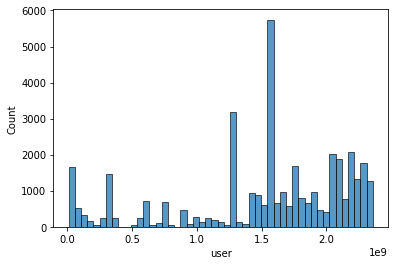

In [53]:
sns.histplot(df['user']) #plotting distribution of user

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


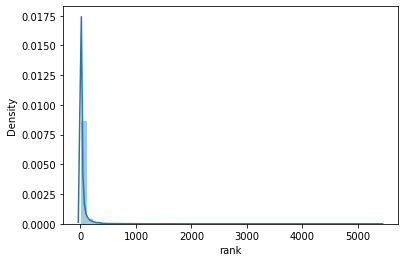

In [54]:
sns.distplot(df['rank']) #plotting distribution of values

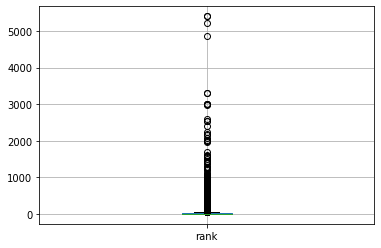

In [55]:
df.boxplot(column='rank') # checking for outliers 

In [56]:
IQR=df['rank'].quantile(0.75)-df['rank'].quantile(0.25) 
IQR

24.0

In [57]:
lower_bridge=df['rank'].quantile(0.25)-(IQR*2)
upper_bridge=df['rank'].quantile(0.75)+(IQR*2)
print(lower_bridge), print(upper_bridge)

-46.0
74.0


(None, None)

In [58]:
df.loc[df['rank']>=74,'rank']=74 #replacing outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


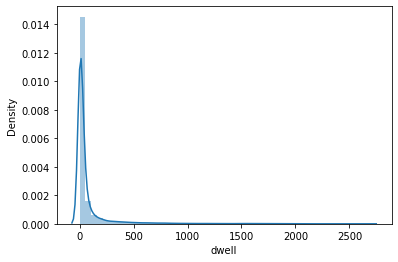

In [59]:
sns.distplot(df['dwell']) #plotting distribution for attribute 'dwell'

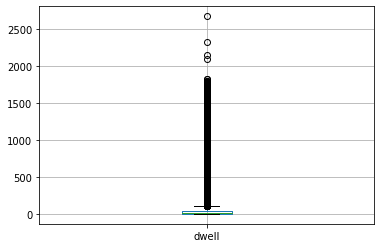

In [60]:
df.boxplot(column='dwell') #checking for outliers under attribute 'dwell'

In [61]:
IQR=df['dwell'].quantile(0.75)-df['dwell'].quantile(0.25) 
IQR

41.0

In [62]:
lower_bridge=df['dwell'].quantile(0.25)-(IQR*2)
upper_bridge=df['dwell'].quantile(0.75)+(IQR*2)
print(lower_bridge), print(upper_bridge)

-79.0
126.0


(None, None)

In [63]:
df.loc[df['dwell']>=126,'dwell']=126 #replacing outliers 

2. Principal Component Analysis (PCA)

In [64]:
df3=df.copy()

In [65]:
df3=df3.drop(columns=['Id'])

In [66]:
df3.drop(columns=['psrel'], inplace= True) #X Values for both datasets

In [67]:
#Scaling before PCA
scaler=StandardScaler()
scl_df= scaler.fit_transform(df3)

In [68]:
#Execute PCA
pca=PCA(n_components=0.95)
pca_df=pca.fit_transform(scl_df)

In [69]:
pca_df.shape

(38000, 15)

In [70]:
pca_X = pd.DataFrame(data=pca_df)

In [71]:
#Split X variables to train and test as before
X=pca_X.iloc[:33000,:]
TEST_X=pca_X.iloc[33000:,:]

In [72]:
train=df.iloc[:33000,:]
test=df.iloc[33000:,:]

In [73]:
y=train['psrel'] #y values

In [74]:
df2=test.drop(columns=['psrel'])

In [75]:
#Convert id to integer type
df2['Id'] =df2['Id'].astype(int)

3. Oversampling Technique to deal with imbalanced dataset

Class=0, n=31038 (94.055%)
Class=1, n=1962 (5.945%)


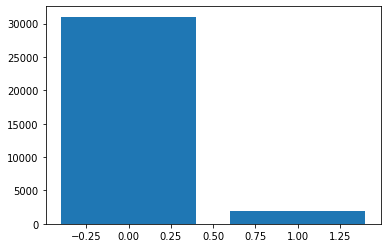

In [76]:
# checking imbalance
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [77]:
# use oversampling technique for class balance
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=0, n=31038 (50.000%)
Class=1, n=31038 (50.000%)


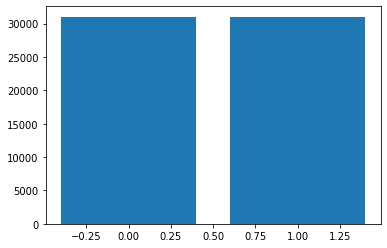

In [78]:
counter = Counter(y_sm)
for k,v in counter.items():
    per = v / len(y_sm) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [79]:
X_train, X_test, y_train, y_test = train_test_split( X_sm, y_sm , test_size=0.20, random_state=42)

## Random Forest Baseline Machine Learning Algorithm after Data Augmentation



In [80]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
#Execute cross-validation
score_cross_val=cross_val_score(classifier,X_train,y_train,cv=10)
score_cross_val

array([0.97321788, 0.97583568, 0.97744664, 0.97482884, 0.97341925,
       0.97160693, 0.97422473, 0.97643979, 0.97664116, 0.97120419])

In [82]:
score_cross_val.mean()

0.9744865082561416

In [83]:
# Model evaluation
prediction=classifier.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(f1_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[5988  159]
 [ 179 6090]]
0.9729988816104809
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      6147
         1.0       0.97      0.97      0.97      6269

    accuracy                           0.97     12416
   macro avg       0.97      0.97      0.97     12416
weighted avg       0.97      0.97      0.97     12416



In [84]:
# Extract predictions for kaggle submission
predictions=classifier.predict(TEST_X)
pd.DataFrame(predictions).set_index(df2['Id']).rename(columns={17:'psrel'}).to_csv('upload_random_2.csv')

## Dense 3 Layer Baseline Neural Network after Data Augmentation

In [85]:
# Use the model for predictions
# Initialising the ANN
classifier1 = Sequential()

# Adding the input layer 
classifier1.add(Dense(50, kernel_initializer='he_uniform',activation='relu',input_dim = 15))

# Adding the hidden layer
classifier1.add(Dense(25, kernel_initializer='he_uniform',activation='relu'))

# Adding the output layer
classifier1.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
classifier1.compile(loss='mean_squared_error', optimizer='Adamax')

# Fitting the ANN to the Training set
model1_history=classifier1.fit(X_train, y_train,validation_split=0.20, batch_size = 25, epochs = 50,verbose=1)

Epoch 1/50
1590/1590 [==============================] - 3s 1ms/step - loss: 0.2289 - val_loss: 0.1741
Epoch 2/50
1590/1590 [==============================] - 2s 1ms/step - loss: 0.1699 - val_loss: 0.1591
Epoch 3/50
1590/1590 [==============================] - 2s 1ms/step - loss: 0.1528 - val_loss: 0.1495
Epoch 4/50
1590/1590 [==============================] - 2s 1ms/step - loss: 0.1457 - val_loss: 0.1415
Epoch 5/50
1590/1590 [==============================] - 2s 1ms/step - loss: 0.1374 - val_loss: 0.1355
Epoch 6/50
1590/1590 [==============================] - 2s 1ms/step - loss: 0.1310 - val_loss: 0.1302
Epoch 7/50
1590/1590 [==============================] - 2s 1ms/step - loss: 0.1263 - val_loss: 0.1260
Epoch 8/50
1590/1590 [==============================] - 2s 1ms/step - loss: 0.1206 - val_loss: 0.1219
Epoch 9/50
1590/1590 [==============================] - 2s 1ms/step - loss: 0.1165 - val_loss: 0.1190
Epoch 10/50
1590/1590 [==============================] - 2s 1ms/step - loss: 0.112

In [86]:
#Evaluate model
y_preds = classifier1.predict(X_test)
y_preds = np.round(y_preds)
print(f1_score(y_test,y_preds))
print(classification_report(y_test,y_preds))

0.9016053460327215
              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89      6147
         1.0       0.87      0.94      0.90      6269

    accuracy                           0.90     12416
   macro avg       0.90      0.90      0.90     12416
weighted avg       0.90      0.90      0.90     12416



In [87]:
# Extract predictions for kaggle submission
predictions=classifier1.predict_classes(TEST_X)
pd.DataFrame(predictions).set_index(df2['Id']).rename(columns={0:'psrel'}).to_csv('upload_3L_NN_2.csv')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Dense Deep Neural Network after Data Augmentation

In [88]:
# Built the new improved model based on grid search results
# Initialising the ANN
classifier = Sequential()

# Adding the input layer 
classifier.add(Dense(50, kernel_initializer='normal',activation='relu',input_dim = 15))

# Adding the hidden layer
classifier.add(Dense(50, kernel_initializer='normal',activation='relu'))

# Adding the hidden layer
classifier.add(Dense(25, kernel_initializer='normal',activation='relu'))

# Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
classifier.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.20, batch_size = 128, epochs = 50)

Epoch 1/50
311/311 [==============================] - 1s 3ms/step - loss: 0.6051 - accuracy: 0.6781 - val_loss: 0.4827 - val_accuracy: 0.7749
Epoch 2/50
311/311 [==============================] - 1s 2ms/step - loss: 0.4506 - accuracy: 0.7900 - val_loss: 0.4056 - val_accuracy: 0.8224
Epoch 3/50
311/311 [==============================] - 1s 2ms/step - loss: 0.3885 - accuracy: 0.8316 - val_loss: 0.3813 - val_accuracy: 0.8326
Epoch 4/50
311/311 [==============================] - 1s 2ms/step - loss: 0.3597 - accuracy: 0.8450 - val_loss: 0.3550 - val_accuracy: 0.8475
Epoch 5/50
311/311 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.8576 - val_loss: 0.3375 - val_accuracy: 0.8550
Epoch 6/50
311/311 [==============================] - 1s 2ms/step - loss: 0.3176 - accuracy: 0.8641 - val_loss: 0.3255 - val_accuracy: 0.8558
Epoch 7/50
311/311 [==============================] - 1s 2ms/step - loss: 0.2947 - accuracy: 0.8794 - val_loss: 0.3114 - val_accuracy: 0.8671
Epoch 

In [89]:
y_preds = classifier.predict(X_test)
y_preds = np.round(y_preds)
print(confusion_matrix(y_test,y_preds))
print(f1_score(y_test,y_preds))
print(classification_report(y_test,y_preds))

[[5418  729]
 [ 123 6146]]
0.9351795496043822
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      6147
         1.0       0.89      0.98      0.94      6269

    accuracy                           0.93     12416
   macro avg       0.94      0.93      0.93     12416
weighted avg       0.94      0.93      0.93     12416



In [90]:
# Extract predictions for kaggle submission
predictions=classifier.predict_classes(TEST_X)
pd.DataFrame(predictions).set_index(df2['Id']).rename(columns={0:'psrel'}).to_csv('upload_DENSE_NN_2.csv')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Wide and Deep Neural Network after Data Augmentation

In [91]:
EarlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto',restore_best_weights=True)

In [92]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(50, kernel_initializer='he_uniform',activation='relu')(input_)
hidden2 = keras.layers.Dense(40, kernel_initializer='he_uniform',activation='relu')(hidden1)
hidden3 = keras.layers.Dense(35, kernel_initializer='he_uniform',activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))(concat)
model2 = keras.Model(inputs=[input_], outputs=[output])
model2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model2.fit(X_train, y_train,validation_split=0.10, batch_size = 128, epochs = 125, callbacks= [EarlyStop])

Epoch 1/125
350/350 [==============================] - 1s 3ms/step - loss: 0.6417 - accuracy: 0.6520 - val_loss: 0.5250 - val_accuracy: 0.7569
Epoch 2/125
350/350 [==============================] - 1s 2ms/step - loss: 0.5082 - accuracy: 0.7698 - val_loss: 0.4821 - val_accuracy: 0.7904
Epoch 3/125
350/350 [==============================] - 1s 2ms/step - loss: 0.4683 - accuracy: 0.8011 - val_loss: 0.4529 - val_accuracy: 0.8087
Epoch 4/125
350/350 [==============================] - 1s 2ms/step - loss: 0.4445 - accuracy: 0.8107 - val_loss: 0.4320 - val_accuracy: 0.8266
Epoch 5/125
350/350 [==============================] - 1s 2ms/step - loss: 0.4267 - accuracy: 0.8223 - val_loss: 0.4251 - val_accuracy: 0.8246
Epoch 6/125
350/350 [==============================] - 1s 2ms/step - loss: 0.4113 - accuracy: 0.8317 - val_loss: 0.4028 - val_accuracy: 0.8403
Epoch 7/125
350/350 [==============================] - 1s 2ms/step - loss: 0.3945 - accuracy: 0.8432 - val_loss: 0.3924 - val_accuracy: 0.8468

In [93]:
#Evaluate model
print(model2.evaluate(X_test, y_test)) 
y_preds = model2.predict(X_test)
y_preds = np.round(y_preds)
print(confusion_matrix(y_test,y_preds))
print(f1_score(y_test,y_preds))
print("Classification Report: \n", classification_report(y_test, y_preds))

388/388 [==============================] - 1s 2ms/step - loss: 0.2312 - accuracy: 0.9226
[0.2311694175004959, 0.9225998520851135]
[[5591  556]
 [ 405 5864]]
0.9242651115139097
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      6147
         1.0       0.91      0.94      0.92      6269

    accuracy                           0.92     12416
   macro avg       0.92      0.92      0.92     12416
weighted avg       0.92      0.92      0.92     12416



In [94]:
# Extract predictions for kaggle submission
predictions=model2.predict(TEST_X)
predictions=np.round(predictions)
predictions = predictions.astype(int)
pd.DataFrame(predictions).set_index(df2['Id']).rename(columns={0:'psrel'}).to_csv('upload_WIDEDEEP_NN_2.csv')